In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../data/fisheries_cattle_ok.csv")

In [3]:
df.head(3)

,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_0_6,CATTLE_AGE_6_6,CATTLE_AGE_6_12,CATTLE_AGE_12_18,CATTLE_AGE_18_24,CATTLE_AGE_24_30,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS
0,2014,Boyne,BEEF,C,0,0,0,3,199,504,3929,57144
1,2020,Doonbeg,BEEF,C,0,0,0,0,11,41,312,5863
2,2019,Ilen,BEEF,C,0,0,0,0,12,78,473,6794


In [4]:
df.dtypes

YEAR                   int64
LOCATION              object
CATTLE_BREED_TYPE     object
CATTLE_GENDER         object
CATTLE_AGE_0_6         int64
CATTLE_AGE_6_6         int64
CATTLE_AGE_6_12        int64
CATTLE_AGE_12_18       int64
CATTLE_AGE_18_24       int64
CATTLE_AGE_24_30       int64
CATTLE_AGE_30_36       int64
CATTLE_AGE_36_PLUS     int64
dtype: object

In [5]:
df.isna().sum()

YEAR                  0
LOCATION              0
CATTLE_BREED_TYPE     0
CATTLE_GENDER         0
CATTLE_AGE_0_6        0
CATTLE_AGE_6_6        0
CATTLE_AGE_6_12       0
CATTLE_AGE_12_18      0
CATTLE_AGE_18_24      0
CATTLE_AGE_24_30      0
CATTLE_AGE_30_36      0
CATTLE_AGE_36_PLUS    0
dtype: int64

In [6]:
df.columns

Index(['YEAR', 'LOCATION', 'CATTLE_BREED_TYPE', 'CATTLE_GENDER',
       'CATTLE_AGE_0_6', 'CATTLE_AGE_6_6', 'CATTLE_AGE_6_12',
       'CATTLE_AGE_12_18', 'CATTLE_AGE_18_24', 'CATTLE_AGE_24_30',
       'CATTLE_AGE_30_36', 'CATTLE_AGE_36_PLUS'],
      dtype='object')

In [7]:
df["YEAR"].value_counts()

2020    504
2014    501
2019    501
2018    500
2017    499
2015    499
2016    499
Name: YEAR, dtype: int64

In [8]:
df["LOCATION"].value_counts()

Boyne        294
Doonbeg      294
Ilen         294
Dargle       294
Inny         294
Nore         294
Moy          294
Vartry       294
Dodder       294
Currane      294
Gweebarra    293
Erriff       270
Name: LOCATION, dtype: int64

In [9]:
df["CATTLE_BREED_TYPE"].value_counts()

BEEF     1764
DAIRY    1739
Name: CATTLE_BREED_TYPE, dtype: int64

In [10]:
df["CATTLE_GENDER"].value_counts()

C    1176
M    1164
F    1163
Name: CATTLE_GENDER, dtype: int64

In [11]:
df.describe()

,YEAR,CATTLE_AGE_0_6,CATTLE_AGE_6_6,CATTLE_AGE_6_12,CATTLE_AGE_12_18,CATTLE_AGE_18_24,CATTLE_AGE_24_30,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS
count,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000
mean,2017.003997,199.013703,879.411647,4861.249215,1055.110191,4329.667713,573.125036,1488.315729,5833.965173
std,2.002564,419.229429,1960.876775,10349.550723,2513.425008,9668.027380,1201.619899,3123.442653,16059.156178
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,12.000000,9.000000,27.000000,24.000000
50%,2017.000000,6.000000,39.000000,190.000000,26.000000,133.000000,65.000000,160.000000,222.000000
75%,2019.000000,135.500000,360.500000,2701.000000,408.000000,1780.000000,376.500000,1618.500000,1281.000000
max,2020.000000,1899.000000,8806.000000,47728.000000,12260.000000,45338.000000,7203.000000,24984.000000,106374.000000


<Figure size 720x360 with 0 Axes>

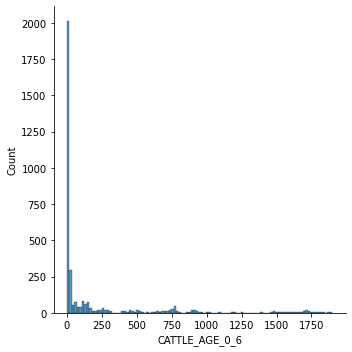

In [12]:
plt.figure(figsize=(10,5))
ax = sns.displot(data=df, x="CATTLE_AGE_0_6")

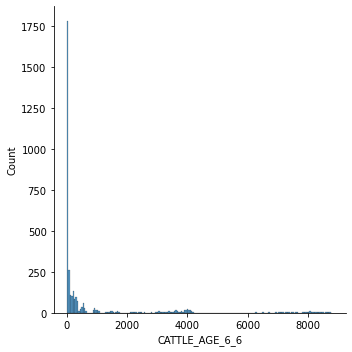

In [13]:
sns.displot(data=df, x="CATTLE_AGE_6_6")

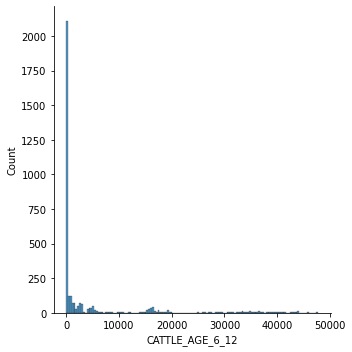

In [14]:
sns.displot(data=df, x="CATTLE_AGE_6_12")

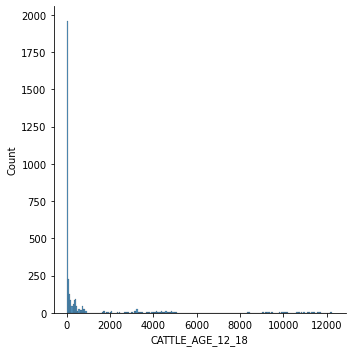

In [15]:
sns.displot(data=df, x="CATTLE_AGE_12_18")

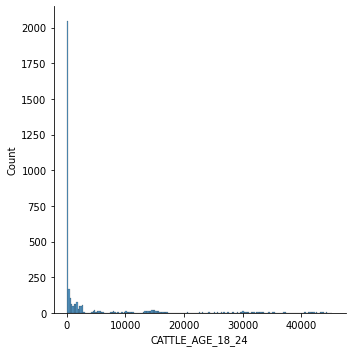

In [16]:
sns.displot(data=df, x="CATTLE_AGE_18_24")

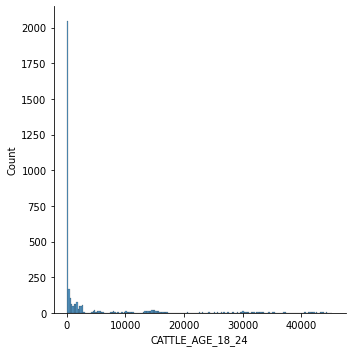

In [17]:
sns.displot(data=df, x="CATTLE_AGE_18_24")

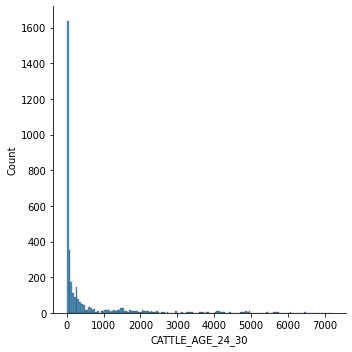

In [18]:
sns.displot(data=df, x="CATTLE_AGE_24_30")

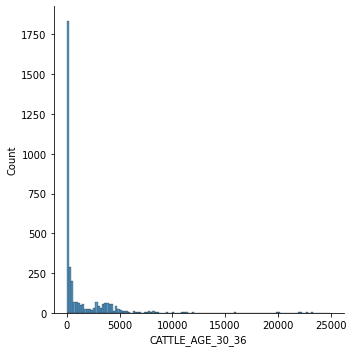

In [19]:
sns.displot(data=df, x="CATTLE_AGE_30_36")

<AxesSubplot:xlabel='YEAR'>

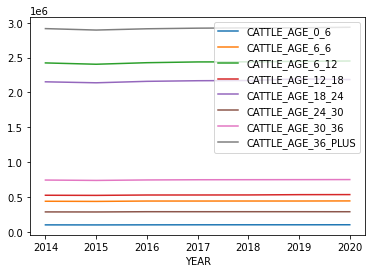

In [212]:
df.groupby("YEAR").sum().plot()

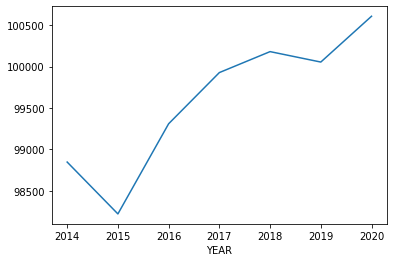

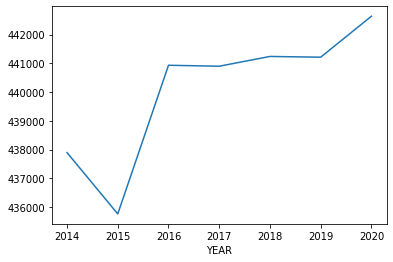

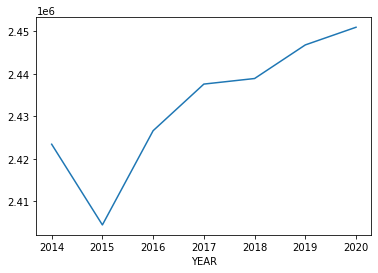

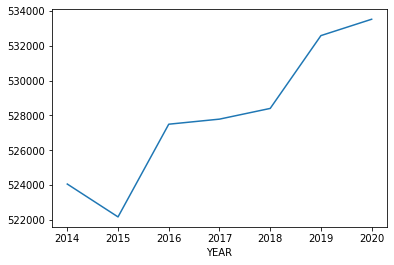

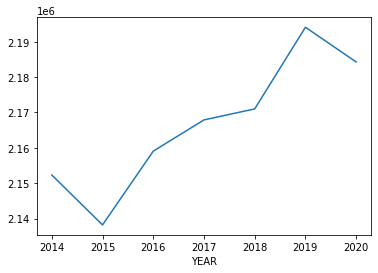

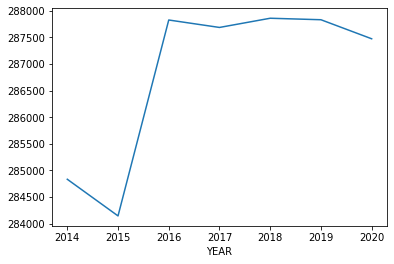

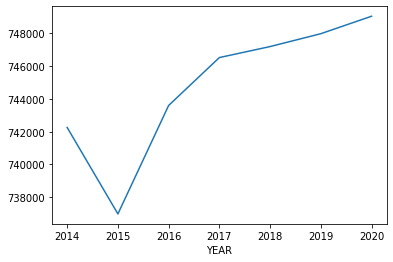

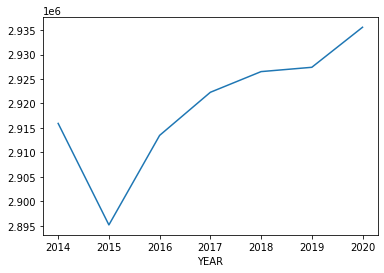

In [213]:
for column in df.groupby("YEAR").sum():
    df.groupby("YEAR").sum()[column].plot()
    plt.show()

<AxesSubplot:>

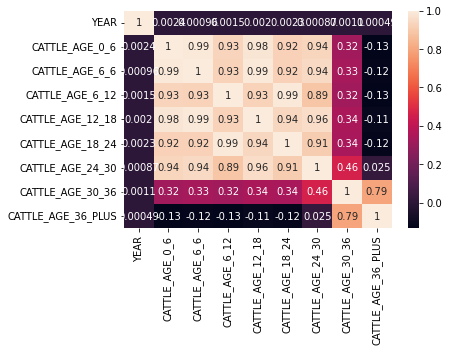

In [214]:
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot:xlabel='CATTLE_AGE_0_6', ylabel='CATTLE_AGE_6_6'>

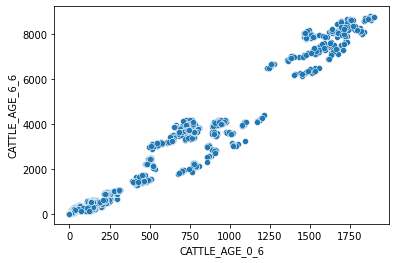

In [215]:
sns.scatterplot(data=df, x="CATTLE_AGE_0_6", y="CATTLE_AGE_6_6")

<AxesSubplot:xlabel='CATTLE_AGE_0_6', ylabel='CATTLE_AGE_30_36'>

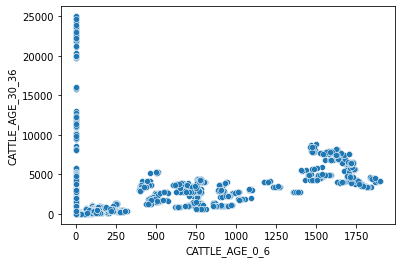

In [216]:
sns.scatterplot(data=df, x="CATTLE_AGE_0_6", y="CATTLE_AGE_30_36")

<AxesSubplot:xlabel='CATTLE_AGE_0_6', ylabel='CATTLE_AGE_30_36'>

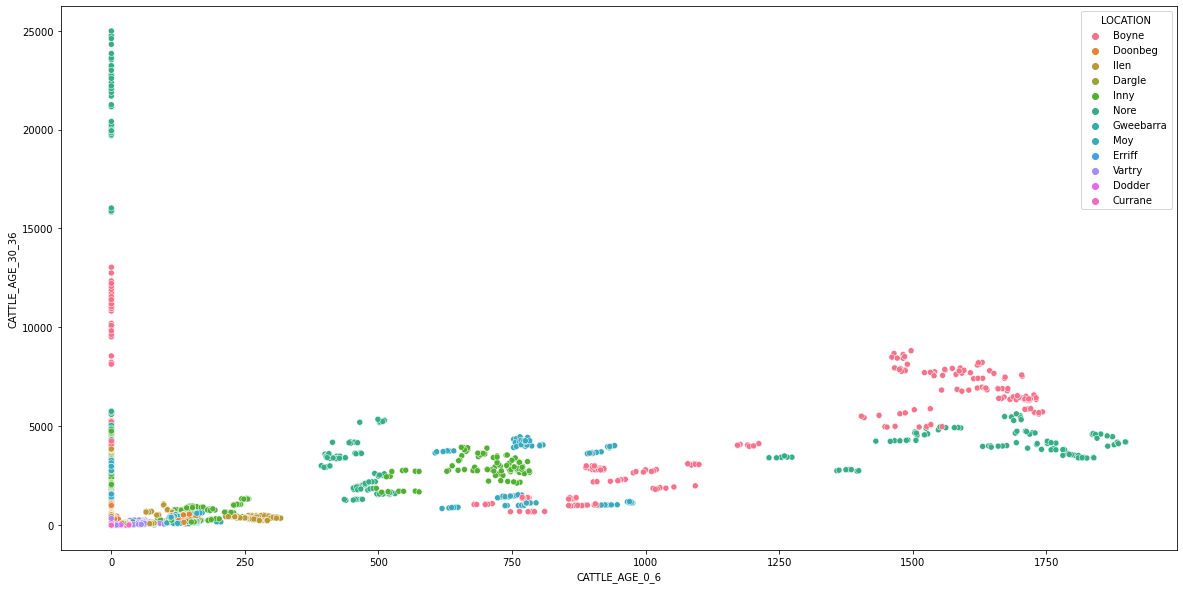

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="CATTLE_AGE_0_6", y="CATTLE_AGE_30_36", hue="LOCATION")

<AxesSubplot:xlabel='CATTLE_AGE_0_6', ylabel='CATTLE_AGE_30_36'>

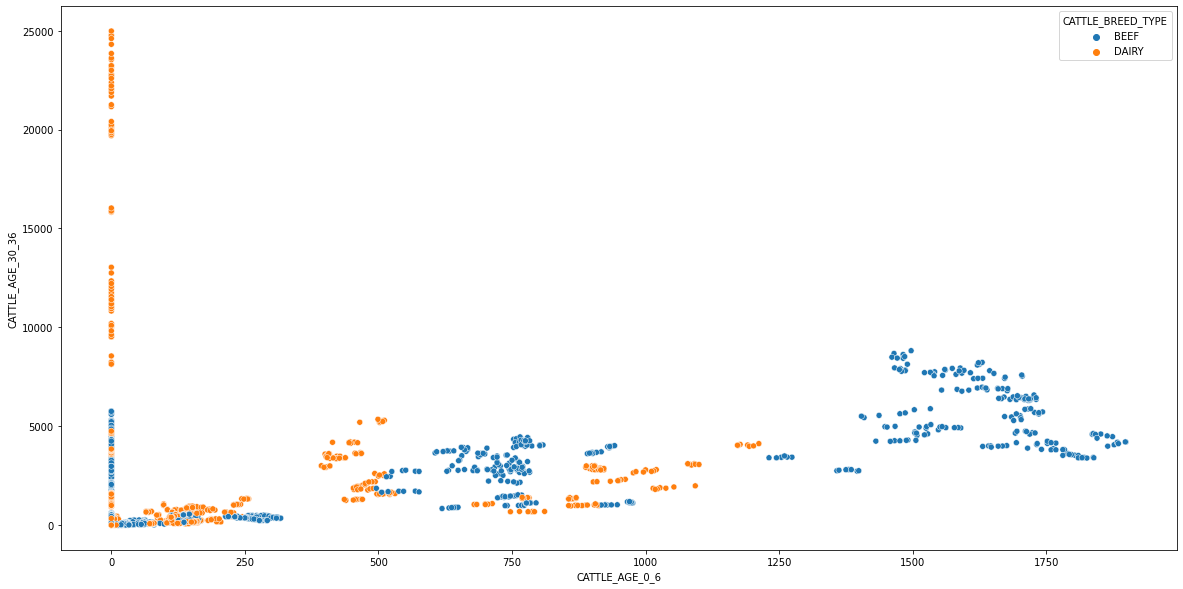

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="CATTLE_AGE_0_6", y="CATTLE_AGE_30_36", hue="CATTLE_BREED_TYPE")

<AxesSubplot:xlabel='CATTLE_AGE_0_6', ylabel='CATTLE_AGE_30_36'>

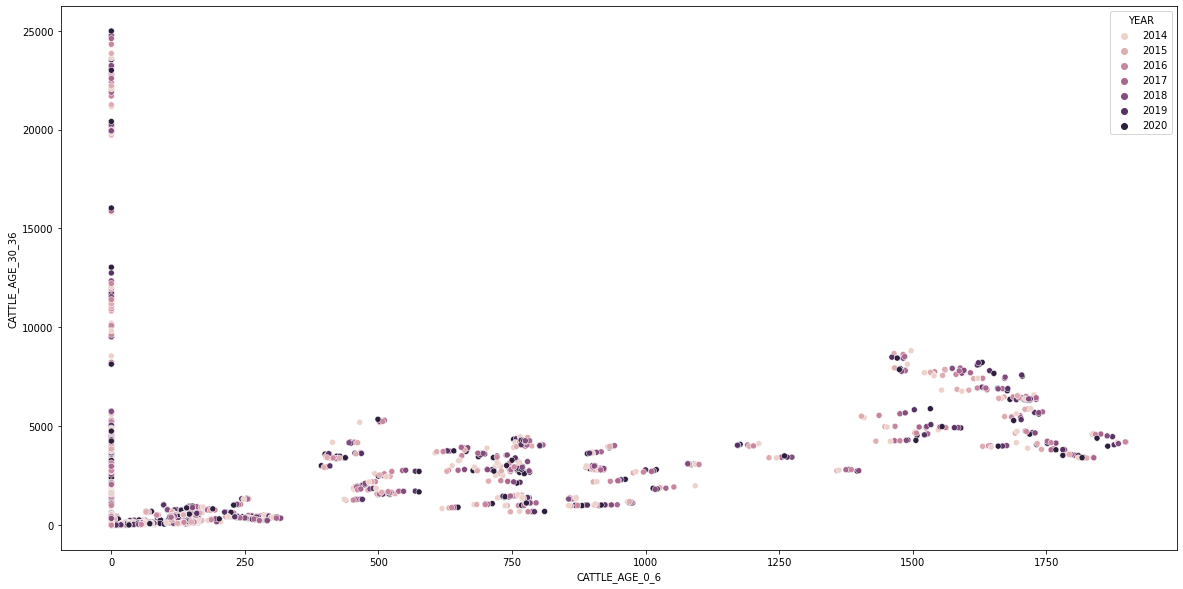

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="CATTLE_AGE_0_6", y="CATTLE_AGE_30_36", hue="YEAR")

<AxesSubplot:xlabel='CATTLE_AGE_0_6', ylabel='CATTLE_AGE_36_PLUS'>

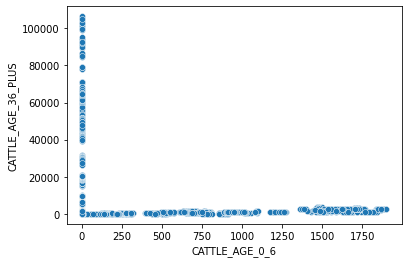

In [217]:
sns.scatterplot(data=df, x="CATTLE_AGE_0_6", y="CATTLE_AGE_36_PLUS")

<AxesSubplot:xlabel='CATTLE_AGE_30_36', ylabel='CATTLE_AGE_36_PLUS'>

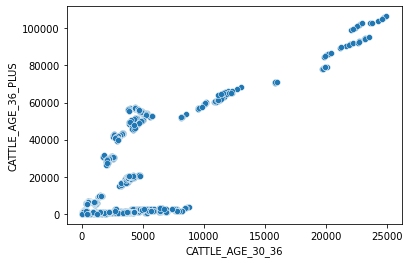

In [218]:
sns.scatterplot(data=df, x="CATTLE_AGE_30_36", y="CATTLE_AGE_36_PLUS")

In [219]:
df.head(3)

,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_0_6,CATTLE_AGE_6_6,CATTLE_AGE_6_12,CATTLE_AGE_12_18,CATTLE_AGE_18_24,CATTLE_AGE_24_30,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS
0,2014,Boyne,BEEF,C,0,0,0,3,199,504,3929,57144
1,2020,Doonbeg,BEEF,C,0,0,0,0,11,41,312,5863
2,2019,Ilen,BEEF,C,0,0,0,0,12,78,473,6794


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df.drop(columns=["YEAR","LOCATION","CATTLE_BREED_TYPE",
                    "CATTLE_GENDER","CATTLE_AGE_30_36",
                    "CATTLE_AGE_36_PLUS"]).dropna())
print(pca.explained_variance_ratio_)

[0.98788879]


In [31]:
df["cattle_pca"] = pca.transform(df.drop(columns=["YEAR","LOCATION","CATTLE_BREED_TYPE",
                    "CATTLE_GENDER","CATTLE_AGE_30_36",
                    "CATTLE_AGE_36_PLUS"]))

In [32]:
df = df.drop(columns=["CATTLE_AGE_0_6","CATTLE_AGE_6_6","CATTLE_AGE_6_12",
                   "CATTLE_AGE_12_18","CATTLE_AGE_18_24","CATTLE_AGE_24_30"])

<AxesSubplot:>

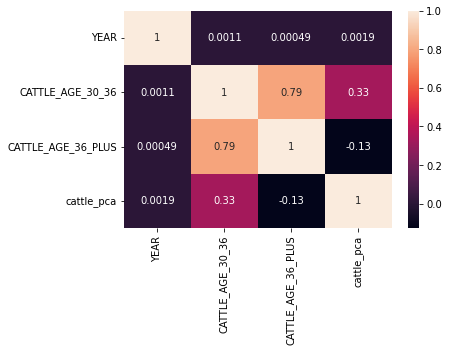

In [33]:
sns.heatmap(data=df.corr(), annot=True)

In [224]:
df.head(3)

,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS,cattle_pca
0,2014,Boyne,BEEF,C,3929,57144,-6507.626832
1,2020,Doonbeg,BEEF,C,312,5863,-6667.995660
2,2019,Ilen,BEEF,C,473,6794,-6664.552811


<AxesSubplot:xlabel='YEAR'>

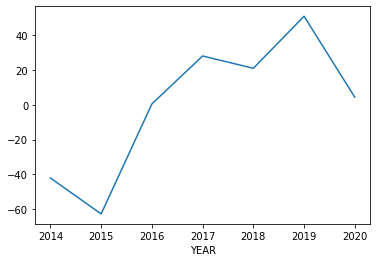

In [225]:
df.groupby("YEAR").mean()["cattle_pca"].plot()

<AxesSubplot:xlabel='CATTLE_AGE_30_36', ylabel='Density'>

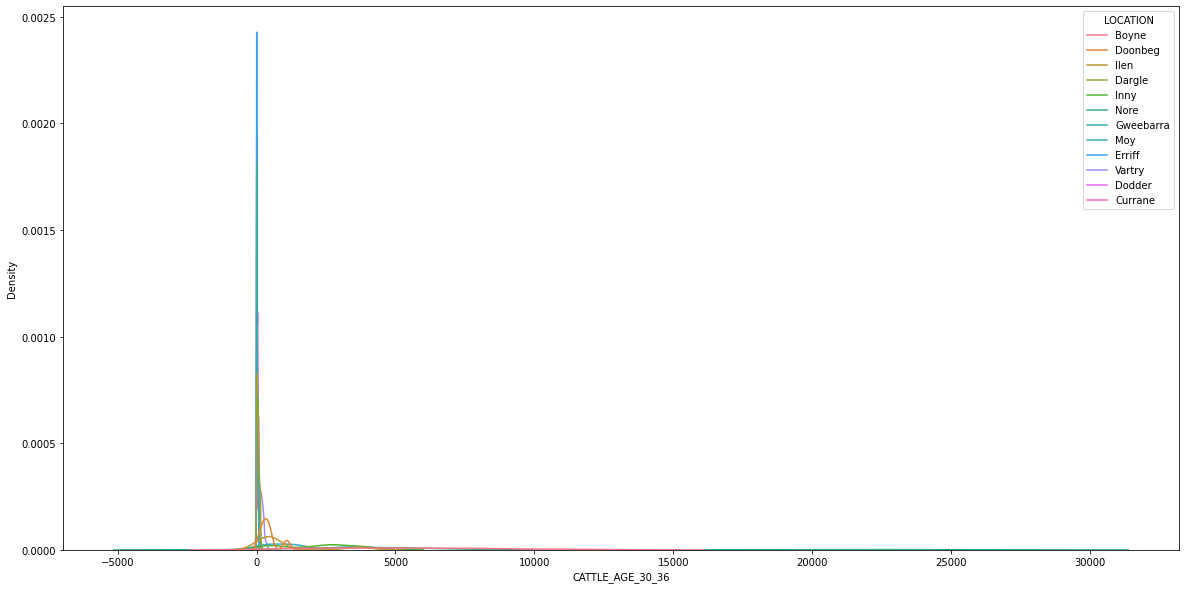

In [35]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df, x="CATTLE_AGE_30_36", hue="LOCATION")

<AxesSubplot:xlabel='LOCATION', ylabel='CATTLE_AGE_30_36'>

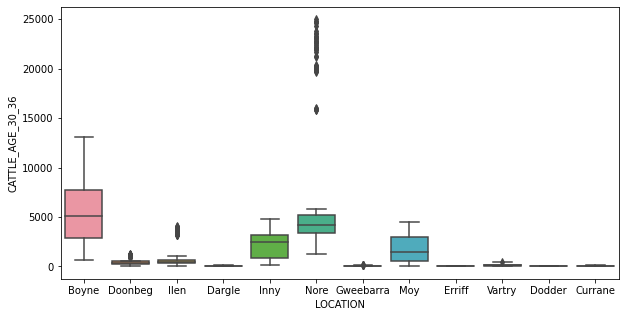

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="LOCATION", y="CATTLE_AGE_30_36")

<AxesSubplot:xlabel='CATTLE_AGE_30_36', ylabel='Density'>

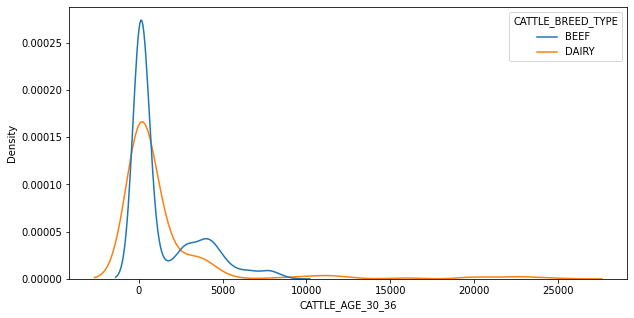

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="CATTLE_AGE_30_36", hue="CATTLE_BREED_TYPE")

<AxesSubplot:xlabel='CATTLE_BREED_TYPE', ylabel='CATTLE_AGE_30_36'>

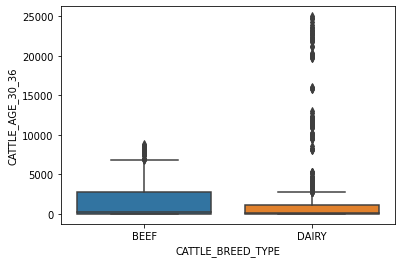

In [39]:
sns.boxplot(data=df, x="CATTLE_BREED_TYPE", y="CATTLE_AGE_30_36")

<AxesSubplot:xlabel='CATTLE_BREED_TYPE', ylabel='CATTLE_AGE_30_36'>

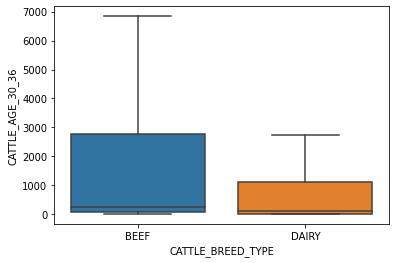

In [40]:
sns.boxplot(data=df, x="CATTLE_BREED_TYPE", y="CATTLE_AGE_30_36", showfliers=False)

<AxesSubplot:xlabel='CATTLE_AGE_30_36', ylabel='Density'>

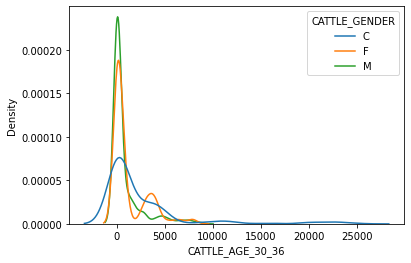

In [41]:
sns.kdeplot(data=df, x="CATTLE_AGE_30_36", hue="CATTLE_GENDER")

<AxesSubplot:xlabel='CATTLE_GENDER', ylabel='CATTLE_AGE_30_36'>

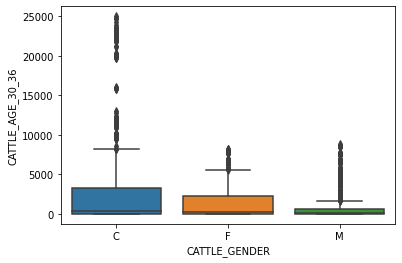

In [42]:
sns.boxplot(data=df, x="CATTLE_GENDER", y="CATTLE_AGE_30_36")

<AxesSubplot:xlabel='CATTLE_GENDER', ylabel='CATTLE_AGE_30_36'>

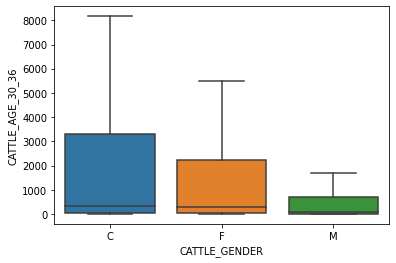

In [43]:
sns.boxplot(data=df, x="CATTLE_GENDER", y="CATTLE_AGE_30_36",showfliers=False)

In [48]:
x_columns=["YEAR","CATTLE_BREED_TYPE","CATTLE_GENDER",
           "CATTLE_AGE_30_36","CATTLE_AGE_36_PLUS","cattle_pca"]

### Machine Learning

In [46]:
scaler = MinMaxScaler()

In [49]:
X = pd.get_dummies(df[x_columns])

In [50]:
X

,YEAR,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS,cattle_pca,CATTLE_BREED_TYPE_BEEF,CATTLE_BREED_TYPE_DAIRY,CATTLE_GENDER_C,CATTLE_GENDER_F,CATTLE_GENDER_M
0,2014,3929,57144,-6507.626832,1,0,1,0,0
1,2020,312,5863,-6667.995660,1,0,1,0,0
2,2019,473,6794,-6664.552811,1,0,1,0,0
3,2019,7915,1680,43995.788427,1,0,0,1,0
4,2014,8138,1764,44672.553289,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
3498,2018,5677,1427,49641.918327,1,0,0,1,0
3499,2018,342,1668,-6671.068274,0,1,1,0,0
3500,2017,523,166,-3212.993182,1,0,0,1,0
3501,2015,519,163,-3221.902465,1,0,0,1,0


In [51]:
X = scaler.fit_transform(X)

## Building and fitting the model

In [239]:
from scipy.spatial.distance import cdist

In [159]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = list(range(1,10))
for k in K:
       kmean_model = KMeans(n_clusters=k).fit(X)
    kmean_model.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmean_model.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmean_model.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmean_model.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmean_model.inertia_

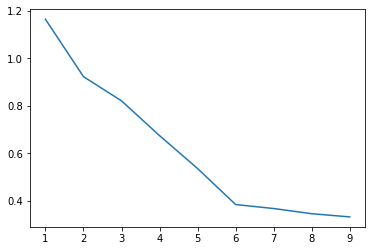

In [161]:
plt.plot(K,distortions)

In [52]:
kmean_model = KMeans(n_clusters=6).fit(X)
kmean_model.fit(X)

KMeans(n_clusters=6)

In [53]:
df["cluster"] = kmean_model.predict(X)

In [54]:
df

,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS,cattle_pca,cluster
0,2014,Boyne,BEEF,C,3929,57144,-6507.626832,2
1,2020,Doonbeg,BEEF,C,312,5863,-6667.995660,2
2,2019,Ilen,BEEF,C,473,6794,-6664.552811,2
3,2019,Boyne,BEEF,F,7915,1680,43995.788427,1
4,2014,Boyne,BEEF,F,8138,1764,44672.553289,1
...,...,...,...,...,...,...,...,...
3498,2018,Boyne,BEEF,F,5677,1427,49641.918327,1
3499,2018,Vartry,DAIRY,C,342,1668,-6671.068274,0
3500,2017,Doonbeg,BEEF,F,523,166,-3212.993182,1
3501,2015,Doonbeg,BEEF,F,519,163,-3221.902465,1


<AxesSubplot:>

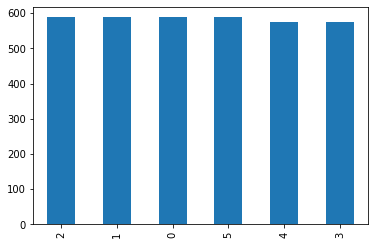

In [56]:
df["cluster"].value_counts().plot.bar()

<AxesSubplot:xlabel='cluster', ylabel='CATTLE_AGE_30_36'>

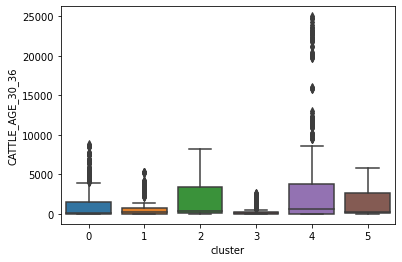

In [242]:
sns.boxplot(data=df,x="cluster",y="CATTLE_AGE_30_36")

<AxesSubplot:xlabel='cluster', ylabel='CATTLE_AGE_36_PLUS'>

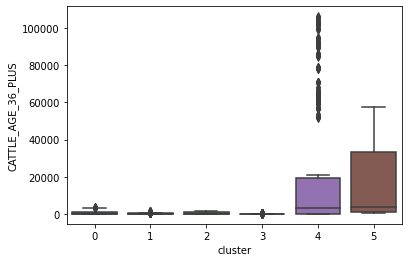

In [243]:
sns.boxplot(data=df,x="cluster",y="CATTLE_AGE_36_PLUS")

<AxesSubplot:xlabel='cluster', ylabel='cattle_pca'>

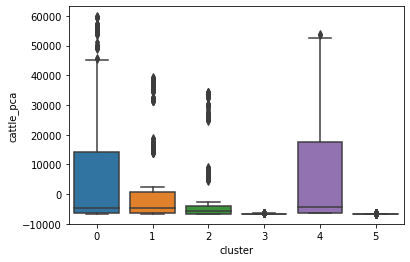

In [170]:
sns.boxplot(data=df,x="cluster",y="cattle_pca")

In [172]:
df.columns

Index(['YEAR', 'LOCATION', 'CATTLE_BREED_TYPE', 'CATTLE_GENDER',
       'CATTLE_AGE_30_36', 'CATTLE_AGE_36_PLUS', 'cattle_pca', 'cluster'],
      dtype='object')

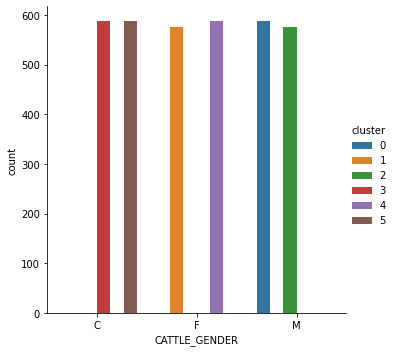

In [180]:
sns.catplot(data=df, x="CATTLE_GENDER", hue = "cluster",kind="count")

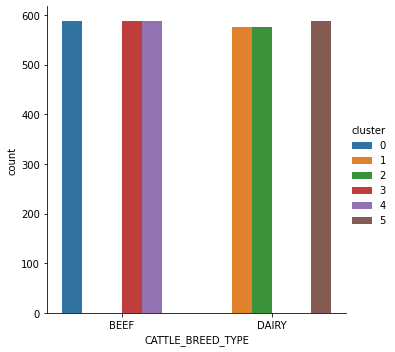

In [181]:
sns.catplot(data=df, x="CATTLE_BREED_TYPE", hue = "cluster",kind="count")

<AxesSubplot:xlabel='cluster', ylabel='YEAR'>

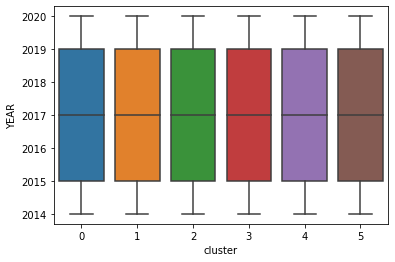

In [182]:
sns.boxplot(data=df,x="cluster",y="YEAR")

In [188]:
for k in range(6):
    print(df[df["cluster"]==k].describe(include="all").drop(columns=["cluster"]))

               YEAR LOCATION CATTLE_BREED_TYPE CATTLE_GENDER  \
count    588.000000      588               588           588   
unique          NaN       12                 1             1   
top             NaN     Nore              BEEF             M   
freq            NaN       49               588           588   
mean    2017.000000      NaN               NaN           NaN   
std        2.001703      NaN               NaN           NaN   
min     2014.000000      NaN               NaN           NaN   
25%     2015.000000      NaN               NaN           NaN   
50%     2017.000000      NaN               NaN           NaN   
75%     2019.000000      NaN               NaN           NaN   
max     2020.000000      NaN               NaN           NaN   

        CATTLE_AGE_30_36  CATTLE_AGE_36_PLUS    cattle_pca  
count         588.000000          588.000000    588.000000  
unique               NaN                 NaN           NaN  
top                  NaN                 NaN    

### End

In [57]:
df = df.groupby(["YEAR","CATTLE_BREED_TYPE"]).sum().reset_index()

In [58]:
df

,YEAR,CATTLE_BREED_TYPE,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS,cattle_pca,cluster
0,2014,BEEF,358046,1464425,635274.535822,672
1,2014,DAIRY,384210,1451506,-656333.764942,579
2,2015,BEEF,355421,1451514,620252.586362,672
3,2015,DAIRY,381562,1443691,-651523.620260,570
4,2016,BEEF,358559,1461677,639593.768345,672
5,2016,DAIRY,385039,1451808,-639356.496503,570
6,2017,BEEF,359764,1465752,646811.622914,672
7,2017,DAIRY,386758,1456536,-632832.217478,570
8,2018,BEEF,359059,1466227,645876.287249,672
9,2018,DAIRY,388133,1460283,-635406.397890,574


In [59]:
df = df[["YEAR","CATTLE_BREED_TYPE","cattle_pca"]].pivot_table(values="cattle_pca",index="YEAR",
                                                          columns="CATTLE_BREED_TYPE")

In [60]:
df

CATTLE_BREED_TYPE,BEEF,DAIRY
YEAR,,
2014,635274.535822,-656333.764942
2015,620252.586362,-651523.620260
2016,639593.768345,-639356.496503
2017,646811.622914,-632832.217478
2018,645876.287249,-635406.397890
2019,664637.552458,-639173.542970
2020,655260.721566,-653081.034675


In [61]:
df.columns.name = ""

In [62]:
df = df.reset_index()

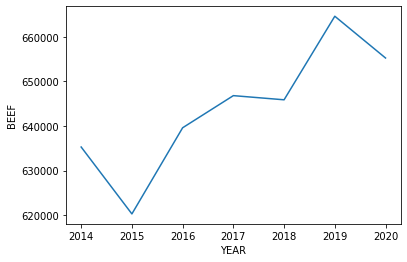

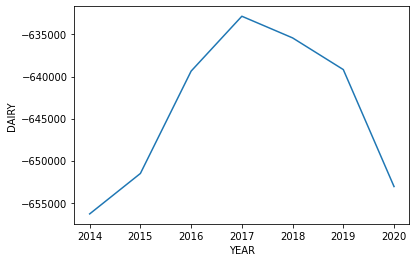

In [63]:
sns.lineplot(data=df, x="YEAR", y="BEEF")
plt.show()
sns.lineplot(data=df, x="YEAR", y="DAIRY")
plt.show()

In [263]:
df.to_csv("cattle_year.csv")